# How to Measure Young's Modulus

Perhaps the most fundamental property of a material is: how does it behave when you push or pull on it? Is it stiff like diamond or soft like Jello? The relationship between <b>forces</b> and <b>deformation</b> is fundamental to the study of materials science, engineering mechanics, biomechanics, and physics, and yet when presented with a new material, we are unable to predict this property from theory - <b>we need to measure it experimentally</b>. 

What is remarkable, is that when the relationship between force and deformation was measured for different materials, a common trend emerged. The [polymath](https://en.wikipedia.org/wiki/Polymath) [Robert Hooke](https://en.wikipedia.org/wiki/Robert_Hooke) was the first to state the law that relates force to deformation (stretching/compression) in 1678, in which he wrote:
<blockquote>
    <i>ut tensio, sic vis</i> ("as the extension, so the force")
</blockquote>    
In other words, the force required to stretch a spring is proportional to the amount it is stretch: the relationship between force and deformation is <b>linear</b> (as long as the material isn't stretched too much). This law is first encountered for springs, in which we write
\begin{equation}
F = k x,
\label{hooke} \tag{1}
\end{equation}
where $F$ is the force acting to extend/compress the spring, $x$ is the amount of extension, and $k$ is the spring stiffness. 

In the study of the <i>mechanics of materials</i>, we generalize equation~\ref{hooke} to a similar equation that relates <b>stress</b> to <b>strain</b>. Why?

In [1]:
# Python preliminaries, this let's us plot graphs/images in the notebook
%matplotlib notebook

In [3]:
# Installing mplcursors, so we can measure things in pictures
installMPLCursors = !pip install git+https://github.com/anntzer/mplcursors

In [2]:
# Python preliminaries, various libraries we use 
import matplotlib.pyplot as plt   # matlab plotting
import numpy as np                # working with matrices
from skimage import io            # working with images
import mplcursors                 # getting pixel info off images
import pandas as pd               # working with data/tables

<IPython.core.display.Javascript object>


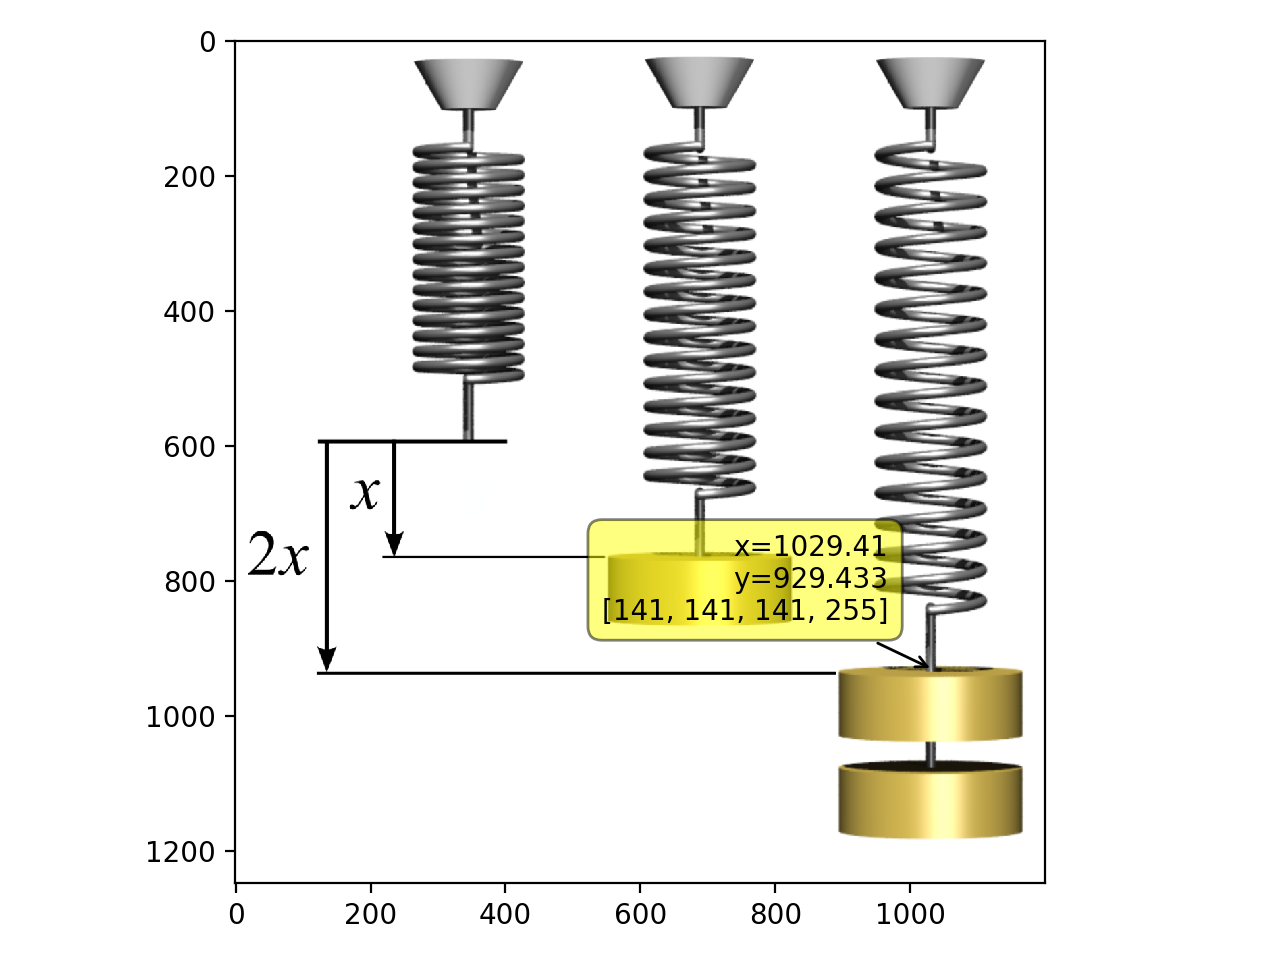

In [4]:
# currently can't get this to work with a Google Drive shareable link, not sure why. working on it.
img = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Hookes-law-springs.png/1200px-Hookes-law-springs.png')

io.imshow(img)
mplcursors.cursor()
plt.show()

In [32]:
force = [0]
displacement = [0]

In [33]:
yi1 = float(input("Enter the y value of the upper point, with no force applied (px): "))
yi2 = float(input("Enter the y value of the upper point, with no force applied (px): "))
L0 = round(abs(yi2-yi1),3) # this length must be positive
print("Initial length L0 =", L0)

Enter the y value of the upper point, with no force applied (px): 108.158
Enter the y value of the upper point, with no force applied (px): 594.4
Initial length L0 = 486.242


In [36]:
# run this cell as many times as needed to input all of your measurements
F  = float(input("Enter the applied force (# of Masses): "))
y1 = float(input("Enter the y value of the upper point (px): "))
y2 = float(input("Enter the y value of the lower point (px): "))
L  = round(abs(y2-y1),3) # this experiment only involves tension
x = round(L-L0,3)
force.append(F)
displacement.append(x)

print("displacement =", x, "pixels")

Enter the applied force (N): 2
Enter the y value of the upper point (px): 108.158
Enter the y value of the lower point (px): 929.433
displacement = 335.033 pixels


In [42]:
data = {'Force (unitless)': force, 'Displacement (pixels)': displacement}
dataTable = pd.DataFrame(data)
dataTable

,Force (unitless),Displacement (pixels)
0,0.0,0.000
1,1.0,166.034
2,2.0,335.033


<IPython.core.display.Javascript object>


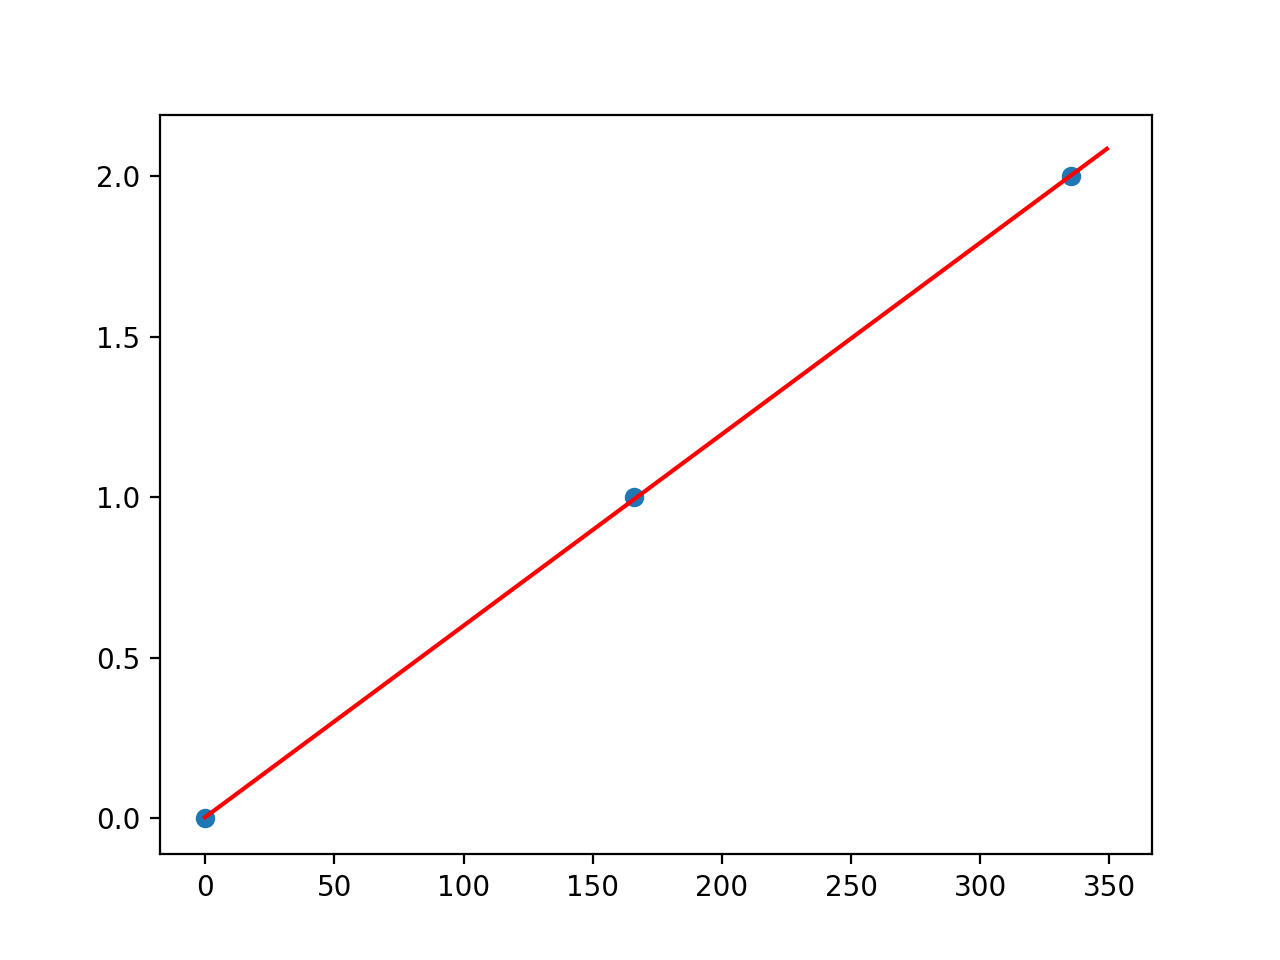

In [49]:
model = np.polyfit(displacement, force, 1) # the 1 is for linear, or 1st order polynomial
predict = np.poly1d(model)
x_lin_reg = range(0, 350)
y_lin_reg = predict(x_lin_reg)
plt.scatter(displacement, force)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
plt.show()

In [56]:
k = round(model[0], 5)
print("Spring Stiffness =", k, "force/pixel")

Spring Stiffness = 0.005969405365573235 force/pixel


## Appendix A: Masses of Various Objects

| Object | Mass (g) |
| --- | --- |
| Dime | 2 |
| Penny | 3 |
| Quarter, Nickel | 5 |
| AAA Battery | 11 |
| AA Battery | 24 |
| 9V Battery | 45 |
| C Battery | 67 |
| D Battery | 136 |